# Regularized Linear Regression Project
-This project dataset has a lot of features related to socio demographic and health resources data by county in the United States, right before the Covid-19 pandemic started (data from 2018 and 2019).

-We want to discover if there is any relationship between health resouces and socio demographic data. Choose one target variable (related to health resources), and use the LASSO model to reduce features to the most important ones for your target.

-Find the parameters for your linear regression between your selected features and your chosen target.

### STEP 1

#### Import Libraries and Data

In [1]:
%pip install --upgrade pip
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2
    Uninstalling pip-22.2:
      Successfully uninstalled pip-22.2
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 118.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 113.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 133.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
TARGET = 'ICU Beds_x'
%pip install plotly
import plotly.express as px
%pip install seaborn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 117.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv',header=0, sep=',')

### STEP 2

#### EDA

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
df_raw.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [6]:
df_raw.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [7]:
df_raw.describe(include = 'object')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [8]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2324,45021,57078,7060,12.369039,7704,13.497319,7642,13.388696,6462,11.321350,...,4271,14.0,13.1,14.9,6153,3.6,3.4,3.8,1575,5
2206,41001,16006,1732,10.820942,1668,10.421092,1516,9.471448,1823,11.389479,...,1274,13.5,12.3,14.8,1739,3.8,3.5,4.1,489,6
137,5057,21741,3196,14.700336,2928,13.467642,2522,11.600202,2351,10.813670,...,1733,16.6,15.6,17.6,2676,4.1,3.8,4.3,655,6
2378,46039,4337,557,12.842979,567,13.073553,422,9.730228,474,10.929214,...,213,10.6,9.6,11.7,352,3.2,2.9,3.5,106,6
634,17083,21847,2284,10.454525,2762,12.642468,2612,11.955875,2434,11.141118,...,1491,10.7,9.7,11.6,1855,3.0,2.8,3.3,530,2
1841,36031,37300,3108,8.332440,3656,9.801609,4088,10.959786,4370,11.715818,...,2771,11.3,10.2,12.4,3540,3.2,3.0,3.5,1010,6
794,19015,26346,2867,10.882107,3279,12.445912,3024,11.478023,3355,12.734381,...,1408,9.9,8.9,10.8,2050,2.9,2.7,3.2,604,5
1910,37045,97645,11340,11.613498,12734,13.041118,12498,12.799426,10322,10.570946,...,7875,14.5,13.6,15.5,11066,3.7,3.5,4.0,2832,5
1920,37065,52005,6244,12.006538,6592,12.675704,6410,12.325738,5668,10.898952,...,4499,19.0,18.0,20.1,7676,4.6,4.4,4.9,1866,4
3050,55011,13125,1447,11.024762,1549,11.801905,1341,10.217143,1417,10.796190,...,795,11.0,10.0,12.0,1148,3.3,3.0,3.5,340,6


In [9]:
df_raw.shape

(3140, 108)

/tmp/ipykernel_1216/2900242811.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

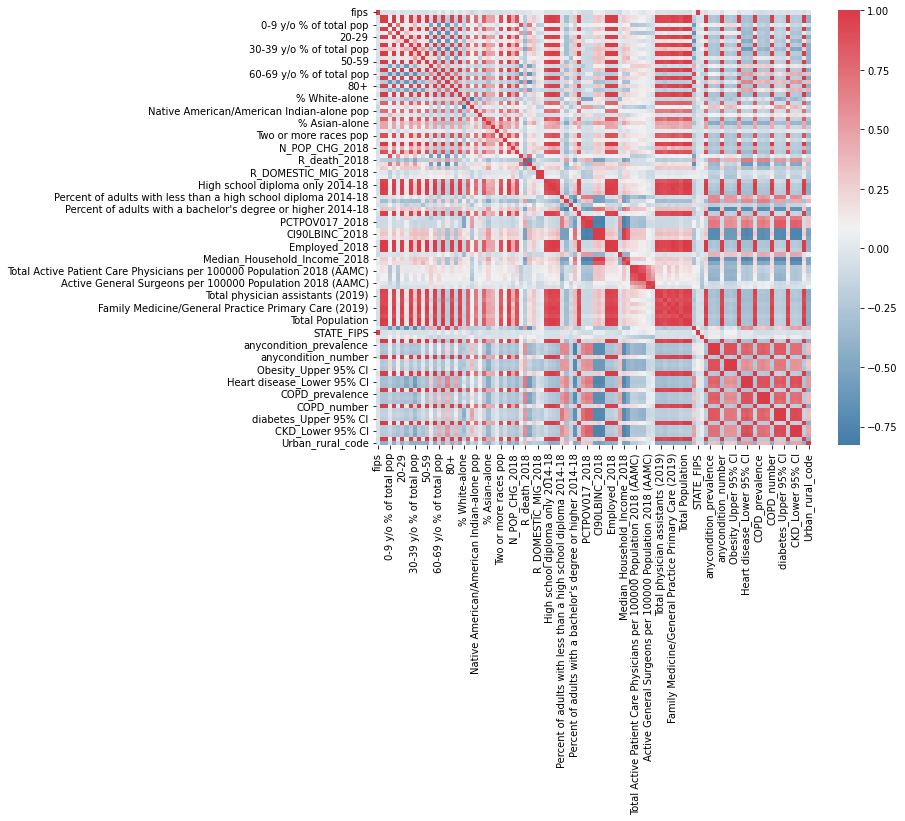

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [11]:
corr

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,...,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,-0.174843,-0.160621,-0.187362,0.989583,-0.218731,-0.202895,-0.230914,0.993889,-0.428608
0-9,-0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,-0.167495,-0.152687,-0.180585,0.984664,-0.216430,-0.200512,-0.229570,0.985337,-0.423641
0-9 y/o % of total pop,-0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,-0.028295,-0.005923,-0.048949,0.047539,-0.133841,-0.117138,-0.153847,0.040384,-0.050916
19-Oct,-0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,-0.178421,-0.163623,-0.191449,0.982778,-0.226956,-0.210885,-0.239865,0.985221,-0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,-0.040631,-0.218731,-0.216430,-0.133841,-0.226956,-0.276999,-0.219593,-0.366835,-0.215739,-0.478115,...,-0.191943,0.918514,0.908023,0.925347,-0.175064,1.000000,0.995203,0.995594,-0.183045,0.471775
CKD_Lower 95% CI,-0.044576,-0.202895,-0.200512,-0.117138,-0.210885,-0.259547,-0.203506,-0.341480,-0.199999,-0.450913,...,-0.176039,0.924630,0.917499,0.928512,-0.159501,0.995203,1.000000,0.989756,-0.167424,0.454327
CKD_Upper 95% CI,-0.033649,-0.230914,-0.229570,-0.153847,-0.239865,-0.296576,-0.232199,-0.393541,-0.228048,-0.506720,...,-0.204368,0.906711,0.892914,0.916610,-0.187528,0.995594,0.989756,1.000000,-0.195052,0.489551
CKD_number,-0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,-0.144575,-0.131191,-0.156493,0.995536,-0.183045,-0.167424,-0.195052,1.000000,-0.416486


In [12]:
np.abs(corr[TARGET])
limit_min = 0.75
limit_max = 1
filtro = corr[TARGET][(np.abs(corr[TARGET])<limit_max)&(np.abs(corr[TARGET])>limit_min)]
print(filtro)

TOT_POP                                                 0.910824
0-9                                                     0.899842
19-Oct                                                  0.899026
20-29                                                   0.913979
30-39                                                   0.908021
40-49                                                   0.899891
50-59                                                   0.904596
60-69                                                   0.912904
70-79                                                   0.901900
80+                                                     0.897627
White-alone pop                                         0.895524
Black-alone pop                                         0.808497
Two or more races pop                                   0.791816
POP_ESTIMATE_2018                                       0.910824
GQ_ESTIMATES_2018                                       0.860321
Less than a high school d

In [13]:
df_raw = df_raw.drop(columns=list(filtro.index))

In [14]:
df_raw

,fips,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,1001,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,...,8.6,7.3,9.9,12.9,11.9,13.8,3.1,2.9,3.3,3
1,1003,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,...,8.6,7.2,10.1,12.0,11.0,13.1,3.2,3.0,3.5,4
2,1005,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,...,12.1,10.7,13.3,19.7,18.6,20.6,4.5,4.2,4.8,6
3,1007,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,...,10.0,8.8,11.3,14.1,13.2,14.9,3.3,3.1,3.6,2
4,1009,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,...,10.5,9.1,12.0,13.5,12.6,14.5,3.4,3.2,3.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,2.204362,...,6.6,5.7,7.7,8.9,8.3,9.6,2.6,2.4,2.8,5
3136,56039,10.328842,9.466661,12.854729,17.733200,14.830380,12.685759,12.456133,6.797799,2.846497,...,4.9,4.0,6.0,7.2,6.5,8.0,2.4,2.2,2.6,5
3137,56041,15.375142,15.788955,10.606434,13.311001,11.773979,11.990738,12.581901,6.074191,2.497660,...,8.0,7.0,9.2,10.4,9.5,11.2,3.0,2.8,3.2,5
3138,56043,10.881420,14.115409,9.067850,11.452124,11.414077,13.760304,14.178821,9.397590,5.732403,...,8.3,7.1,9.6,11.3,10.3,12.1,3.4,3.2,3.7,6
